In [13]:
import pandas as pd

In [14]:
selected_columns = ['timestamp', 'merchant_category', 'merchant_type', 'merchant', 'amount', 'currency', 'country', 'card_type', 'device', 'channel']

dtypes = {
    "timestamp": "object",
    "merchant_category": "category",
    "merchant_type": "category",
    "merchant": "category",
    "amount": "float64",
    "currency": "category",
    "country": "category",
    "card_type": "category",
    "device": "category",
    "channel": "category"
}

chunksize = 10000

final_data = []

for chunk in pd.read_csv('new_fraud_data.csv', usecols=selected_columns, dtype=dtypes, chunksize=chunksize):
    final_data.append(chunk)

In [15]:
final_df = pd.concat(final_data, ignore_index=True)

final_df.to_csv('10_columns_data.csv', index=False)

### 1 график

In [16]:
first_graph = final_df.copy()
first_graph.head()

,timestamp,merchant_category,merchant_type,merchant,amount,currency,country,card_type,device,channel
0,2024-09-30 00:00:01.034820+00:00,Restaurant,fast_food,Taco Bell,294.87,GBP,UK,Platinum Credit,iOS App,mobile
1,2024-09-30 00:00:01.764464+00:00,Entertainment,gaming,Steam,3368.97,BRL,Brazil,Platinum Credit,Edge,web
2,2024-09-30 00:00:02.273762+00:00,Grocery,physical,Whole Foods,102582.38,JPY,Japan,Platinum Credit,Firefox,web
3,2024-09-30 00:00:02.297466+00:00,Gas,major,Exxon,630.60,AUD,Australia,Premium Debit,iOS App,mobile
4,2024-09-30 00:00:02.544063+00:00,Healthcare,medical,Medical Center,724949.27,NGN,Nigeria,Basic Debit,Chrome,web


In [17]:
first_graph['timestamp'] = pd.to_datetime(first_graph['timestamp'], errors='coerce')

In [18]:
first_graph['date'] = first_graph['timestamp'].dt.date
date_counts = first_graph['date'].value_counts().sort_index()
print(date_counts)

date
2024-09-30    240937
2024-10-01    241811
2024-10-02    242717
2024-10-03    241203
2024-10-04     33328
Name: count, dtype: int64


In [19]:
import matplotlib.pyplot as plt

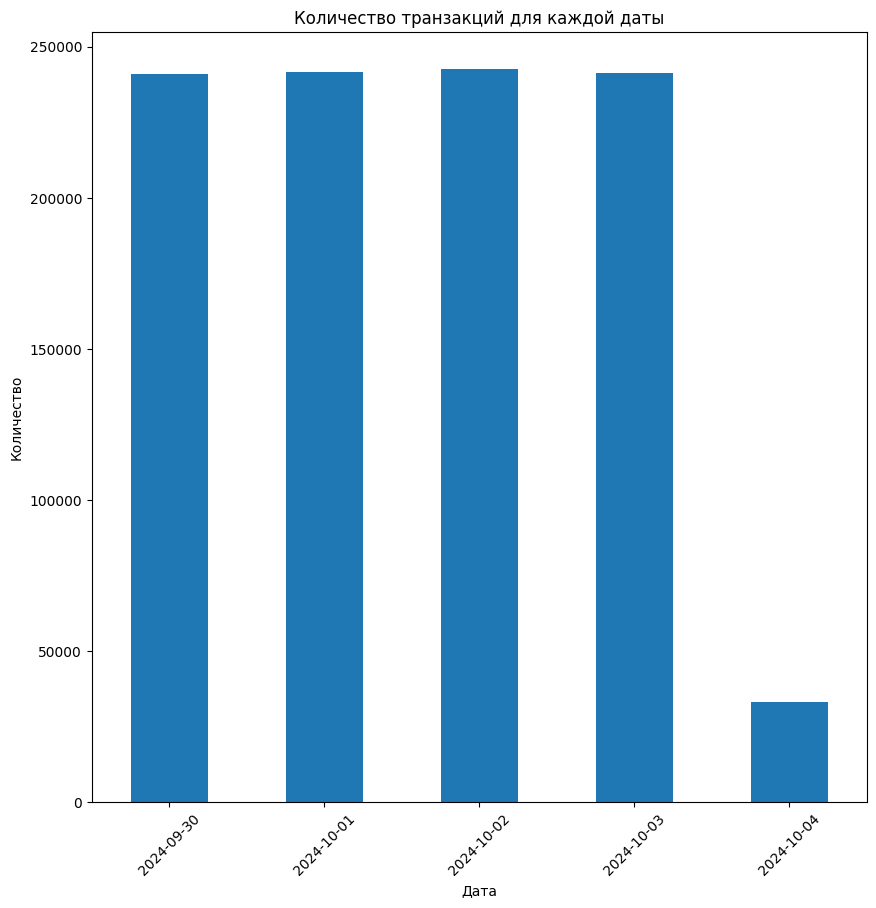

In [20]:
date_counts.plot(kind='bar', figsize=(10, 10))
plt.title("Количество транзакций для каждой даты")
plt.xlabel("Дата")
plt.ylabel("Количество")
plt.xticks(rotation=45)
plt.savefig('graphs/first_graph.png')
plt.show()

### 2 график

In [ ]:
second_graph = final_df.copy()

In [26]:
second_graph['timestamp'] = pd.to_datetime(second_graph['timestamp'], errors='coerce')
restaurant_data = second_graph[second_graph['merchant_category'] == 'Restaurant']

In [30]:
selected_day = pd.to_datetime("2024-09-30")
restaurant_data = restaurant_data[restaurant_data['timestamp'].dt.date == selected_day.date()]

In [34]:
restaurant_data['hour'] = restaurant_data['timestamp'].dt.hour

In [35]:
hourly_spending = restaurant_data.groupby('hour')['amount'].sum()

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(hourly_spending.index, hourly_spending.values, marker='o', color='black')
plt.title('Траты по часам за 30.09.2024 в категории "Рестораны"')
plt.xlabel("Час дняй")
plt.ylabel("Сумма трат")
plt.xticks(range(24))  # Показываем метки для всех часов (с 0 по 23)
plt.grid(True)
plt.tight_layout()
plt.savefig('graphs/second_graph.png')
plt.show()

### 3 график


In [40]:
third_graph = final_df.copy()

In [49]:
card_counts = third_graph['card_type'].value_counts()

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie(
    card_counts.values,
    labels=card_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.tab20.colors
)
plt.title("Распределение видов карт")
plt.savefig('graphs/third_graph.png')
plt.show()

### 4 график

In [52]:
fourth_graph = final_df.copy()

In [60]:
country_spending = fourth_graph.groupby('country')['amount'].sum().sort_values(ascending=False)

/var/folders/cd/1jqr1m291vx1g_5dj8fnp7z40000gn/T/ipykernel_55667/430118023.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_spending = fourth_graph.groupby('country')['amount'].sum().sort_values(ascending=False)


In [ ]:
plt.figure(figsize=(10, 10))
plt.bar(country_spending.index, country_spending.values, color='blue', edgecolor='black')
plt.title('Суммы, потраченные каждой страной')
plt.xlabel('Страна')
plt.ylabel('Сумма трат')
plt.xticks(rotation=45)  # Поворот подписей оси X для удобства
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('graphs/fourth_graph.png')
plt.show()

### 5 график

In [69]:
fifth_graph = final_df.copy()

In [72]:
device_counts = fifth_graph['device'].value_counts()

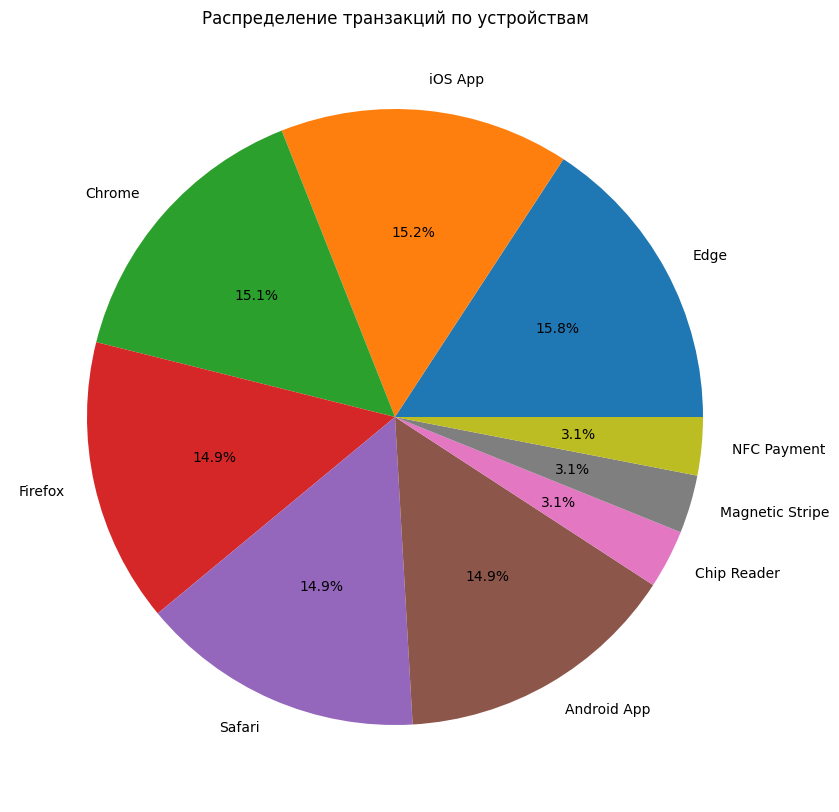

In [73]:
plt.figure(figsize=(10, 10))
plt.pie(
    device_counts.values, 
    labels=device_counts.index, 
    autopct='%1.1f%%'
)
plt.title("Распределение транзакций по устройствам")
plt.savefig('graphs/fifth_graph.png')
plt.show()
